# Méthode du maximum de vraisemblance

## Principe

Soit $X$ une variable aléatoire de loi $L$. On fait l'hypothèse que la loi $L$ est une loi paramétrique, de paramètres $\theta\in\mathbb{R}^d$, où $d$ est le nombre de paramètres.

Supposons que $\{x_1,...,x_n\}$ est un échantillon i.i.d. de la loi $L$. On souhaite identifier la valeur des paramètres $\theta$ dans le but de s'ajuster aux observations.

Soit $f_\theta(x)$ la densité de probabilité de la loi $L$. Puisque les observations sont, par hypothèse indépendante, la densité de probabilité du vecteur $(x_1,...,x_n)$ est égale au produit des densités de probabilité marginales $f_\theta(x_i)$. Par définition, on appelle vraisemblance cette densité de probabilité :
$$
\mathcal{L}_\theta(x) = \prod_{i=1}^n f_\theta(x_i).
$$

En pratique, il est fréquent que le produit des densités soit très proche de zéro, ou très grand. C'est une des raisons pour laquelle on utilise plutôt le logarithme de la vraisemblance. Or le logarithme du produit est égal à la somme des logarithmes. La log-vraisemblance est :
$$
\log(\mathcal{L}_\theta(x)) = \sum_{i=1}^n \log(f_\theta(x_i)),
$$
où $\log(f_\theta(x_i))$ est le logarithme de la densité de probabilité.

## Application au cas de la loi gaussienne

Dans le cas de la loi gaussienne, on peut démontrer que la méthode des moments est équivalente à la méthode du maximum de vraisemblance.

In [1]:
import openturns as ot
import numpy as np

In [2]:
n = 50

In [3]:
N = ot.Normal()

In [4]:
sample = N.getSample(n)

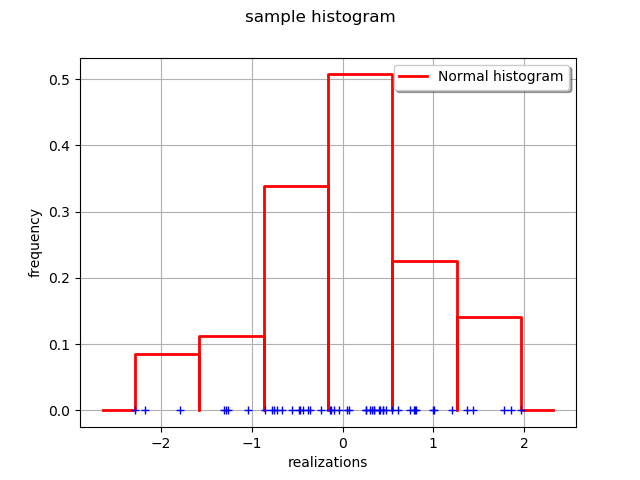

In [5]:
histo = ot.VisualTest_DrawHistogram(sample)
# Ajoute les valeurs de l'échantillon
cloud = ot.Cloud(sample,ot.Sample(n,1))
histo.add(cloud)
histo

Les observations sont représentées dans le graphique par des points bleus.

On définit deux lois candidates : N1 et N2.

In [6]:
N1 = ot.Normal(-5,2.)
N2 = ot.Normal(0.5,0.9)

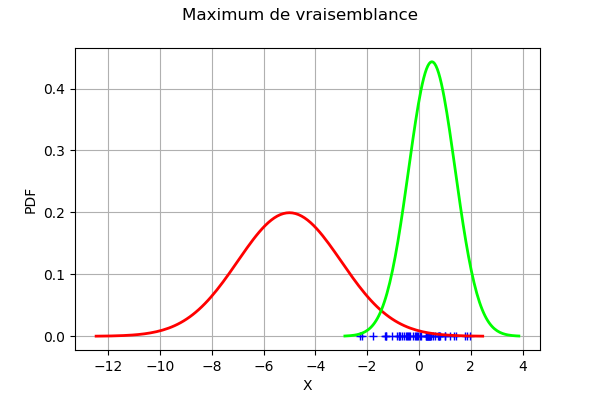

In [7]:
graph = ot.Graph("Maximum de vraisemblance","X","PDF",True)
# Ajoute les valeurs de l'échantillon
cloud = ot.Cloud(sample,ot.Sample(n,1))
graph.add(cloud)
# La loi N1
pdf1 = N1.drawPDF()
graph.add(pdf1)
# La loi N2
pdf2 = N2.drawPDF()
pdf2.setColors(["green"])
graph.add(pdf2)
graph

On observe que la loi rouge est éloignée des observations bleues et que la loi verte est plus proche des données. 
* Pour chaque point bleu (i.e. chaque observation), loi rouge donne la densité de probabilité de chaque observation. Puisque les points bleus sont plutôt sur la droite de la densité rouge, la densité de probabilité des observations est plutôt faible (proche de zéro).
* Pour la loi verte, la densité de probabilité de chaque point bleu est plus élevée.

Calculons la log-vraisemblance des observations pour les lois N1 et N2.

In [8]:
logpdf1 = N1.computeLogPDF(sample)
L1 = np.sum(logpdf1)
L1

-244.8126573753453

In [9]:
logpdf2 = N2.computeLogPDF(sample)
L2 = np.sum(logpdf2)
L2

-75.70517990124242

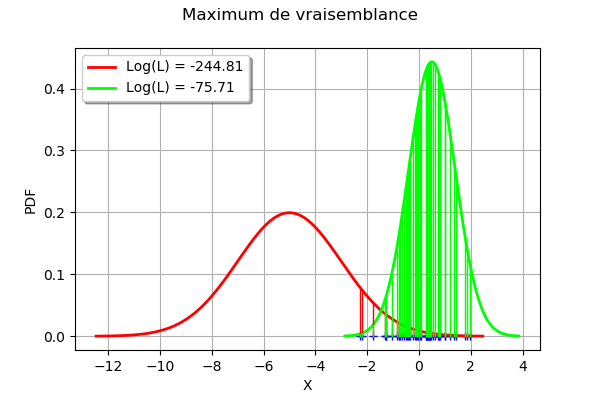

In [10]:
graph = ot.Graph("Maximum de vraisemblance","X","PDF",True,"topleft")
# Ajoute les valeurs de l'échantillon
cloud = ot.Cloud(sample,ot.Sample(n,1))
graph.add(cloud)
# La loi N1
pdf1 = N1.drawPDF()
pdf1.setLegends(["Log(L) = %.2f" % (L1)])
pdf1.setColors(["red"])
graph.add(pdf1)
# La loi N2
pdf2 = N2.drawPDF()
pdf2.setLegends(["Log(L) = %.2f" % (L2)])
pdf2.setColors(["green"])
graph.add(pdf2)
# Ajoute des barres verticales sur N1
for i in range(n):
    xi = sample[i,0]
    yi = N1.computePDF(xi)
    curve = ot.Curve([xi,xi],[0.,yi])
    curve.setColor("red")
    graph.add(curve)
# Ajoute des barres verticales sur N2
for i in range(n):
    xi = sample[i,0]
    yi = N2.computePDF(xi)
    curve = ot.Curve([xi,xi],[0.,yi])
    curve.setColor("green")
    graph.add(curve)
graph

La vraisemblance est le produit des traits verticaux.
* La vraisemblance des observations pour la loi rouge est faible, car les traits verticaux rouges ne sont pas très longs.
* La vraisemblance des observations pour la loi verte est forte, car les traits verticaux verts sont plus longs.
La log-vraisemblance est égale à 